In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import pickle

In [36]:
data =pd.read_csv("data.csv")

### Formatting data 

In [37]:

data  = data.drop(['date','country',"street","statezip","yr_built","yr_renovated"],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond


In [38]:
le = LabelEncoder()

In [39]:
data['city_new'] = le.fit_transform(data['city'])


In [40]:
cols  = ['bedrooms',"bathrooms","floors","price"]

for  col in cols :
    data[col] = data[col].astype(int)

# Because how can 1.50 bathroom exists

In [41]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,city_new
0,313000,3,1,1340,7912,1,0,0,3,1340,0,Shoreline,36
1,2384000,5,2,3650,9050,2,0,4,5,3370,280,Seattle,35
2,342000,3,2,1930,11947,1,0,0,4,1930,0,Kent,18
3,420000,3,2,2000,8030,1,0,0,4,1000,1000,Bellevue,3
4,550000,4,2,1940,10500,1,0,0,4,1140,800,Redmond,31


## Exploring data

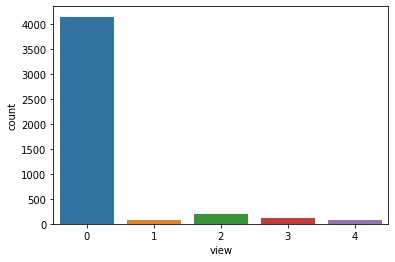

In [42]:
sns.countplot(data=data,x=data['view'])
plt.show()

#### as we can see view of maximum houses is not good but its ok we will adjust

<AxesSubplot:xlabel='condition', ylabel='count'>

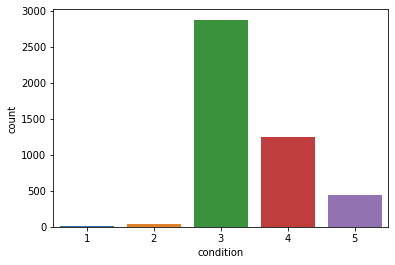

In [43]:
sns.countplot(data=data,x=data['condition'])

#### from the above data we can see condition of most houses is moderate not too good not too bad 

['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point']

Total Cities Found :  44


<AxesSubplot:xlabel='city_new', ylabel='count'>

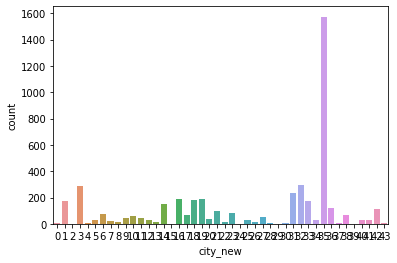

In [44]:
print(list(le.classes_))
print("\nTotal Cities Found : ",len(le.classes_))

sns.countplot(data=data,x=data['city_new'])


In [45]:
data['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

<AxesSubplot:title={'center':'price Range'}>

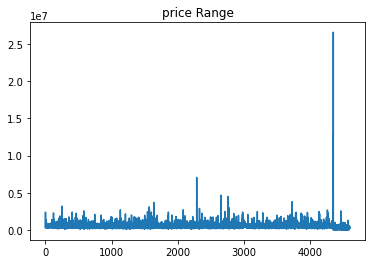

In [46]:
data['price'].plot(title='price Range')

In [47]:
np.mean(data['price'])

551962.9754347826

<AxesSubplot:xlabel='floors', ylabel='count'>

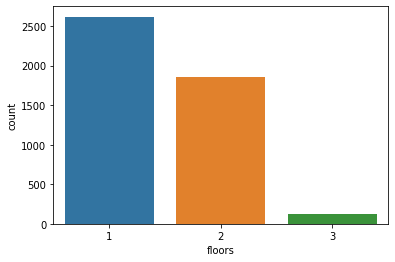

In [48]:
sns.countplot(data=data,x=data['floors'])

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

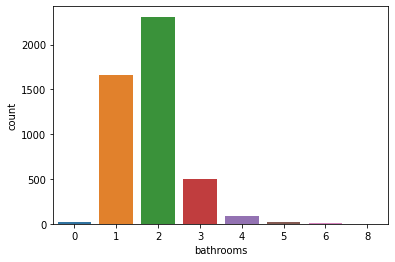

In [49]:
sns.countplot(data=data,x=data['bathrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

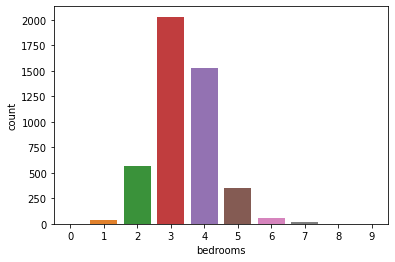

In [50]:
sns.countplot(data=data,x=data['bedrooms'])

<AxesSubplot:xlabel='waterfront', ylabel='count'>

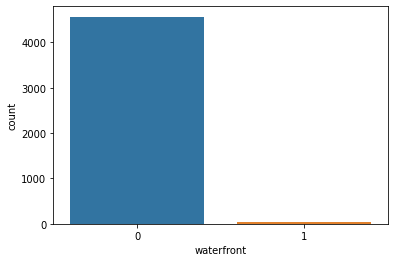

In [51]:
sns.countplot(data=data,x=data['waterfront'])

#### From all the above data we can conclude that most of the houses have :
### =>  no waterfront 
###  =>  3 bedrooms, 2 bathrooms, have moderate condition 
### => have bad view and 2 floors  and is setteled in seattle city 
### => have mean price range $ 551962.97 

## Model Creation

In [52]:
data['sqft_basement'].value_counts()

0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: sqft_basement, Length: 207, dtype: int64

In [53]:
data = data.drop(["city","view","waterfront","sqft_basement"],axis=1)

##### we have removed these values because they are not useful features and sqft_basement has approx 2000 rows have value '0' 

In [54]:
x  = np.array(data.loc[:,data.columns != "price"].values)
y = np.array(data["price"].values)

In [55]:
x

array([[   3,    1, 1340, ...,    3, 1340,   36],
       [   5,    2, 3650, ...,    5, 3370,   35],
       [   3,    2, 1930, ...,    4, 1930,   18],
       ...,
       [   3,    2, 3010, ...,    3, 3010,   32],
       [   4,    2, 2090, ...,    3, 1070,   35],
       [   3,    2, 1490, ...,    4, 1490,    9]], dtype=int64)

In [56]:
y

array([ 313000, 2384000,  342000, ...,  416904,  203400,  220600])

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [58]:
x

array([[   3,    1, 1340, ...,    3, 1340,   36],
       [   5,    2, 3650, ...,    5, 3370,   35],
       [   3,    2, 1930, ...,    4, 1930,   18],
       ...,
       [   3,    2, 3010, ...,    3, 3010,   32],
       [   4,    2, 2090, ...,    3, 1070,   35],
       [   3,    2, 1490, ...,    4, 1490,    9]], dtype=int64)

### using Linear Regression

In [59]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
model_lr.score(x_test,y_test)

0.49144148700417756

In [60]:
predictions_lr = model_lr.predict(x_test)

In [61]:
mean_absolute_percentage_error(predictions_lr,y_test)

0.31831447037015

### using RandomForestRegressor

In [62]:
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

In [63]:
mean_absolute_percentage_error(predictions,y_test)

0.24475387326872342

### Random Forest is the winner !  because it has least Error

### Making Predictions 

In [64]:
a  = [1,1,200,200,1,2,200,36]
model.predict([a])

array([240850.])

In [65]:
le.transform(['Shoreline'])

array([36])

In [66]:
index  = 56
pred = model.predict([x_test[index]])[0]
print(y_test[index])
print("{0:.2f}".format(pred))

1195000
1205000.00


In [67]:
### Saving Model

In [68]:
pickle.dump(model,open("model.pkl","wb"))

In [70]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'city_new'],
      dtype='object')